 # Практическая работа №3: Кластерный анализ.
 Выполнил студент гр. 0373 Сизов Артем. Вариант №20
    

## Цель работы
Освоение основных понятий и некоторых методов кластерного анализа,
в частности, метода k-means и метода поиска сгущений.

## Основные теоретические положения
__Кластерный анализ__ - задача разбиения заданной выборки объектов (ситуаций) на подмножества, называемые кластерами, так, чтобы каждый кластер состоял из схожих объектов, а объекты разных кластеров существенно отличались.

__Этапы кластеризации:__
> 1. Отбор выборки объектов.

> 2. Определение множества переменных, по которым будут оцениваться объекты в выборке. При необходимости - нормализация значений переменных (метод приведения к новому диапазону).

> 3. Вычисление значений меры сходства между объектами.

> 4. Применение метода кластерного анализа для создания групп сходных объектов (кластеров).

> 5. Предоставление результатов анализа.

__Неотрицательная вещественная функция $d(x,y)$ называется__ *метрикой*, __если:__
> 1. $d(x,y)\geq{0}$

> 2. $d(x,y)=d(y,x)$

> 3. $d(x,y)\leq{d(x,z)+d(z,y)}$

__Метрики, используемые в данной практической работе:__

> 1. Евклидово расстояние: $d(x,y)=\sqrt{\sum_{i=1}^{n}(x_{i}-y_{i})^{2}}$

> 2. Расстояние городских кварталов: $d(x,y)=\sum_{i=1}^{n}|x_{i}-y_{i}|$

__Нормализация__: $x_{i} = \frac{x_{i}-\overline{x}}{\sigma}$

__Алгоритм k-means__ - алгоритм кластеризации. Основная идея заключается в том, что на каждлй интерации пересчитывается центр масс (центроид) для каждого кластера, полученного на предыдущем шаге, затем векторы разбиваются на кластеры вновь в соответствии с тем, какой из новых центор оказался ближе по выбранной метрике (используется Евклидово расстояние).

__Алгоритм k-medoids__ - алгоритм, в отличие от k-means, использует для представления центра кластера не центр масс, а один из объектов кластера. Каждый из оставшихся объектов объединятся в кластер с ближайшим медоидом (представительным объектом). Далее необходимо выполнять алгоритм пока стоимость выбора нового медоида снижается. Необходимо определить точку, принадлежащую кластеру, расстояние которой до всех других точек кластера минимально.

__«Грубая» оценка количества кластеров__ - оценка количества кластеров, после которой увеличение количества кластеров нецелесообразно: $k=[\sqrt{\frac{n}{2}}]$

__Метод локтя__ - многократное циклическое испоолнение алгоритма с увеличением количества выбираемых кластеров и откладыванием на графике разброса кластеризации, вычисленного как функция от количества кластеров. Разброс является мерой отношения внутриклассного расстояния:

$W_{C_{j}}=\sum_{x_{i}\in{C_{j}}}{(x_{i}-x_{C_{j}})^2}$, где $W_{C_{j}}$ - разброс внутри кластера, $C_{j}$ - множество элекментов кластеров, $x_{C_{j}}$ - центр кластера.

С увеличением количества кластеров разброс стремится к нулю:

$W=\sum_{j=1}^{k}W_{C_{j}}$

Разброс представляется на графике. По нему определяется при каком количестве кластеров дальнейшее их увеличение уменьшает разброс с меньшей степенью. На графике это выглядит как перегиб.

__FOREL-метод__ - на каждой итерации случайным образом выбирается объект из выборки, вокруг него раздувается сфера (окружность) радиуса R, внутри этой сферы выбирается центр тяжести (центр новой сферы). После того как центр сферы стабилизируется, все объекты внутри сферы с этим центром помечаются как кластеризованные и выкидываются из выборки. Этот процесс мы повторяется до тех пор, пока вся выборка не будет кластеризована. Для данного метода радиус из промежутка: $[R_{min};R_{max}]$, где $R_{min}$ и $R_{max}$ получают из матрицы $D=\left\{ d_{ij}\right\}_{i\gt j}$: $R_{min}=min\left\{d_{ij}\gt{0}\right\},$
$R_{max}=max\left\{ d_{ij}\right\}$

## Постановка задачи
Дано конечное множество из объектов, представленных двумя признаками (в качестве этого множества принимаем исходную двумерную выборку, сформированную ранее в практической работе №2). Выполнить разбиение исходного множества объектов на конечное число подмножеств
(кластеров) с использованием метода k-means и метода поиска сгущений. Полученные результаты содержательно проинтерпретировать.



## Выполнение работы

### Задача 1
Нормализовать множество точек из предыдущей работы, отобразить полученное множество.

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import statistics

from prettytable import PrettyTable

In [ ]:
columns = ['Data_1','Data_2']
df = pd.read_csv('../input/steam-ds/convertcsv (4).csv', header = None, names = columns)
df['Data_1']=df['Data_1'].str.replace(',','')
df['Data_2']=df['Data_2'].str.replace(',','')
df['Data_1']=df['Data_1'].astype('float64')
df['Data_2']=df['Data_2'].astype('float64')

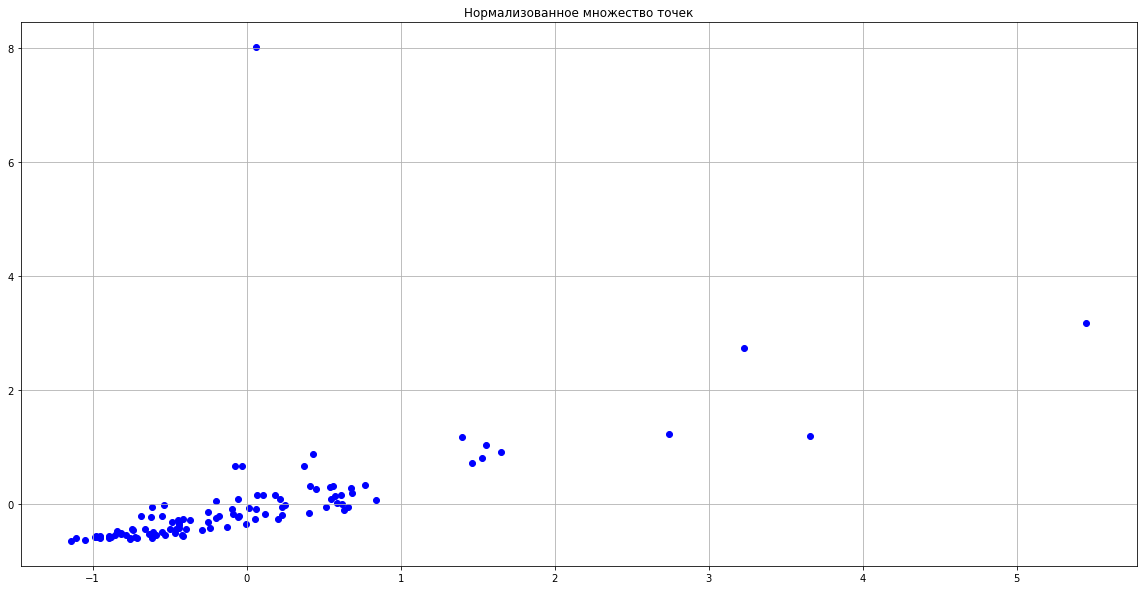

In [ ]:
N = len(df['Data_1'])
mean_1 = sum(df['Data_1'])/N
mean_2 = sum(df['Data_2'])/N

dis_1 = 0
dis_2 = 0

for i in range(N):
    dis_1+=(df['Data_1'][i]-mean_1)**2/N
    dis_2+=(df['Data_2'][i]-mean_2)**2/N
sko_1 = np.sqrt(dis_1)
sko_2 = np.sqrt(dis_2)


for i in range(N):
    df['Data_1'][i]=(df['Data_1'][i]- mean_1)/sko_1
    df['Data_2'][i]=(df['Data_2'][i]- mean_2)/sko_2

plt.subplots(figsize=(20, 10))
plt.scatter(df['Data_1'],df['Data_2'],c='b')
plt.title("Нормализованное множество точек")
plt.grid()
plt.show()

### Задача 2
Определить «грубую» верхнюю оценку количества кластеров ˜𝑘.

In [ ]:
rouppest = int(np.sqrt(N/2)) # rough upper estimate - грубая верхняя оценка
print("«Грубая» верхняя оценка количества кластеров:",rouppest)

«Грубая» верхняя оценка количества кластеров: 7


### Задача 3
Реализовать алгоритм k-means. Отобразить полученные кластеры,
каждый кластер выделить разным цветом или маркером, отметить
центроиды.

In [ ]:
def Kmeans(x,y,prim_Center,n):
    
    res_Center = prim_Center.copy()
    
    bias=np.inf
    while bias>0.001:    
        list_x=[]
        list_y=[]
        for i in range(n):
            list_x+=[[]]
            list_y+=[[]]
        for i in range(len(x)):
            range_=[0]*n
            for j in range(n):
                range_[j]=((x[i]-prim_Center[j][0])**2+(y[i]-prim_Center[j][1])**2)
            min_=100
            l = 0
            for k in range(n):
                if range_[k]<min_:
                    min_=range_[k]
                    l=k
            list_x[l]+=[x[i]]
            list_y[l]+=[y[i]]
        sum_x=[0]*n
        sum_y=[0]*n
        bias_c=[0]*n
        for i in range(n):
            sum_x[i]=sum(list_x[i])/len(list_x[i])
            sum_y[i]=sum(list_y[i])/len(list_y[i])
        for i in range(n):
            bias_c[i]=(sum_x[i]-prim_Center[i][0])**2+(sum_y[i]-prim_Center[i][1])**2
        bias=sum(bias_c)
        for i in range(n):
            res_Center[i][0]=round(sum_x[i],2)
            res_Center[i][1]=round(sum_y[i],2)

        c=[]
        for i in range(n):
            c+=[len(list_x[i])]
    return res_Center, list_x,list_y,c

In [ ]:
def print_gr(Center,list_x,list_y,p):
    fig, graf=plt.subplots(figsize=(20, 10))
    color = ['b','r','g','m','y','c','pink']
    for i in range(0,p):
        graf.scatter(list_x[i],list_y[i],c=color[i])
        graf.plot(Center[i][0],Center[i][1],'k',marker="X",markersize=10)
    graf.set_title('Количество кластеров: %i'%(i+1))
    plt.grid()
    plt.show()

In [ ]:
A = [17,41,60,70,72,90,104]
C = [[[0 for k in range(2)] for j in range(i+1)] for i in range(rouppest)]

for i in range(0,len(A)):
    for j in range(0,i+1):
        C[i][j][0] = df['Data_1'][A[j]]
        C[i][j][1] = df['Data_2'][A[j]]

Table_1 = PrettyTable(["Значение k","Центроиды кластера","Объем кластера"])

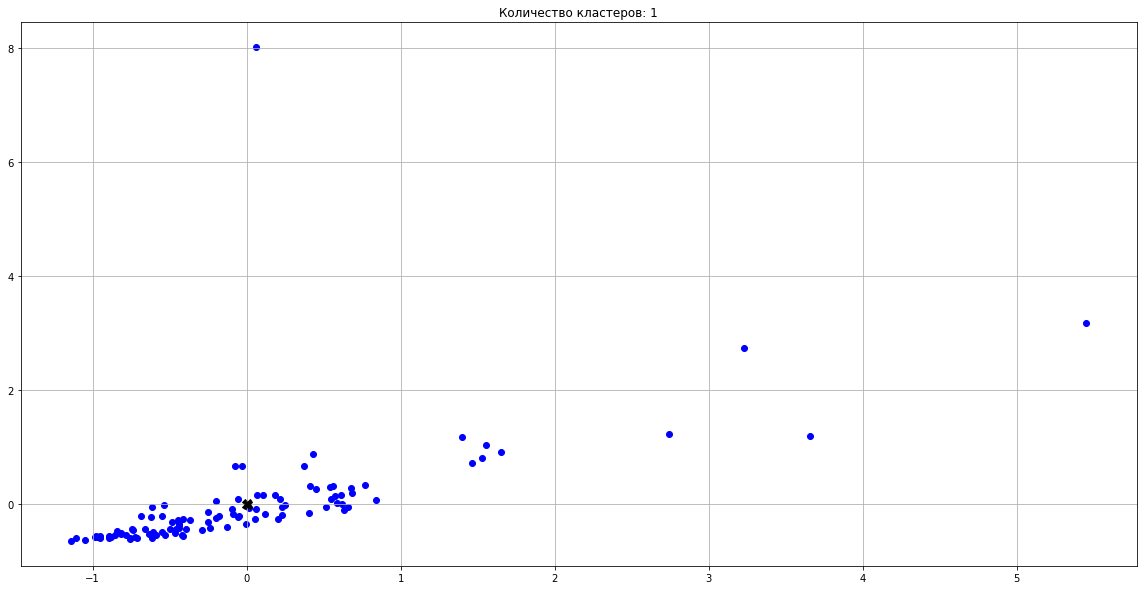

Центроиды: [[-0.0, -0.0]]
Количество элементов в кластерах [105]

 ------------------------------------------------------------------------------------------------------------------------------------------------------


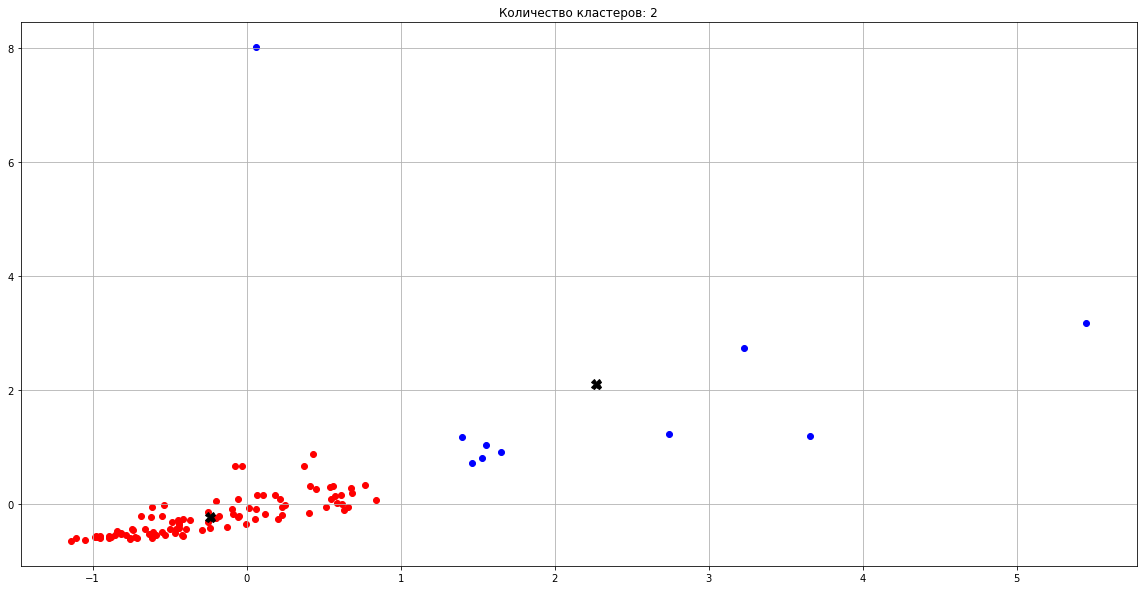

Центроиды: [[2.27, 2.1], [-0.24, -0.22]]
Количество элементов в кластерах [10, 95]

 ------------------------------------------------------------------------------------------------------------------------------------------------------


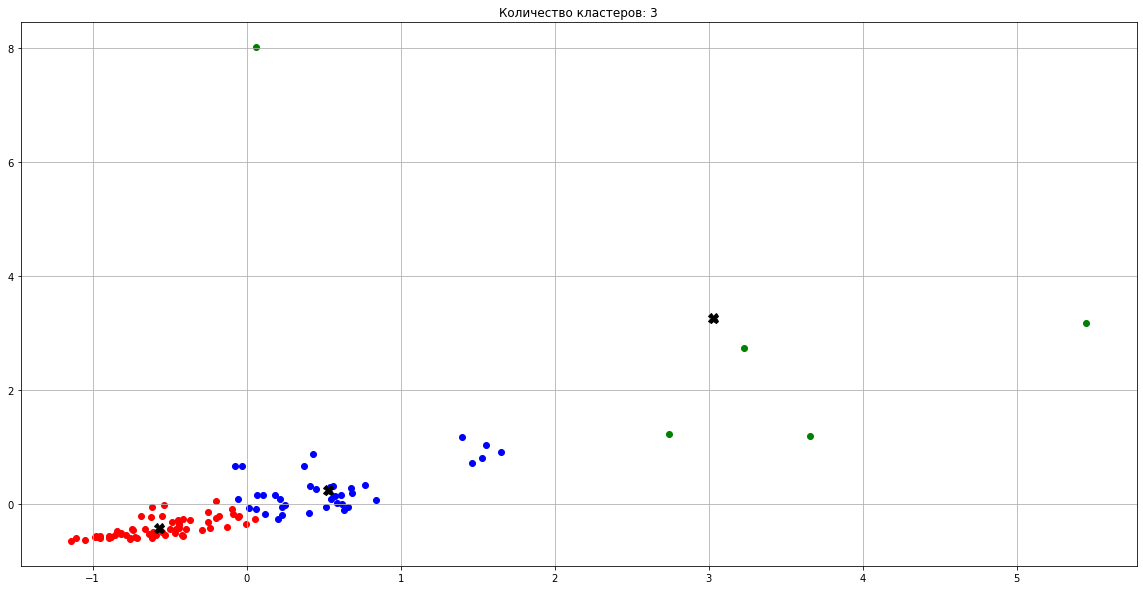

Центроиды: [[0.53, 0.25], [-0.57, -0.42], [3.03, 3.27]]
Количество элементов в кластерах [38, 62, 5]

 ------------------------------------------------------------------------------------------------------------------------------------------------------


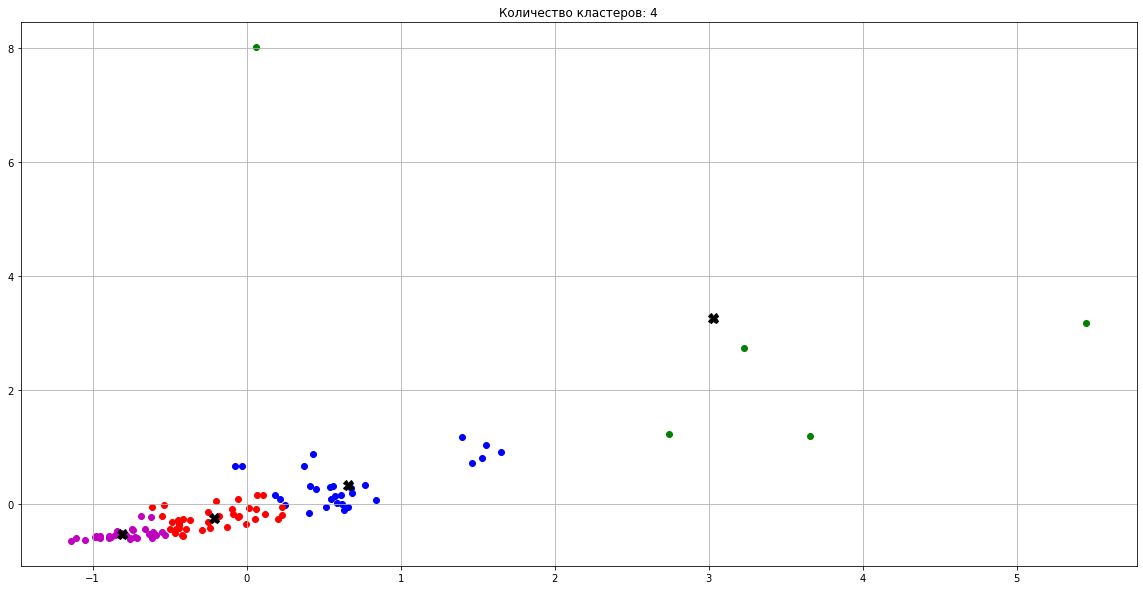

Центроиды: [[0.66, 0.34], [-0.21, -0.24], [3.03, 3.27], [-0.81, -0.53]]
Количество элементов в кластерах [29, 39, 5, 32]

 ------------------------------------------------------------------------------------------------------------------------------------------------------


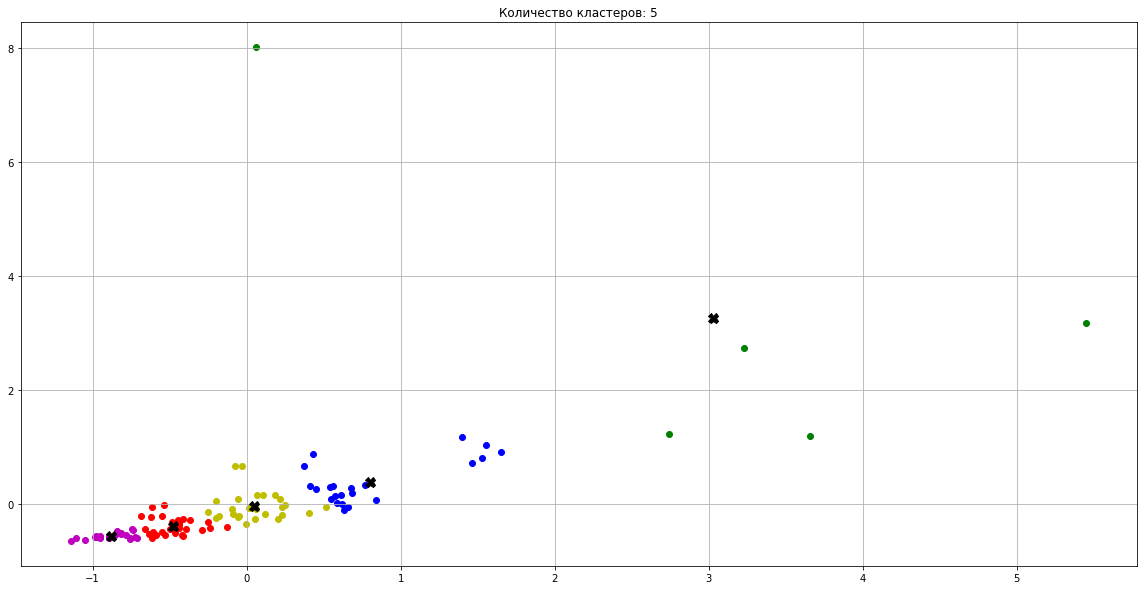

Центроиды: [[0.8, 0.39], [-0.48, -0.38], [3.03, 3.27], [-0.88, -0.56], [0.05, -0.04]]
Количество элементов в кластерах [22, 29, 5, 23, 26]

 ------------------------------------------------------------------------------------------------------------------------------------------------------


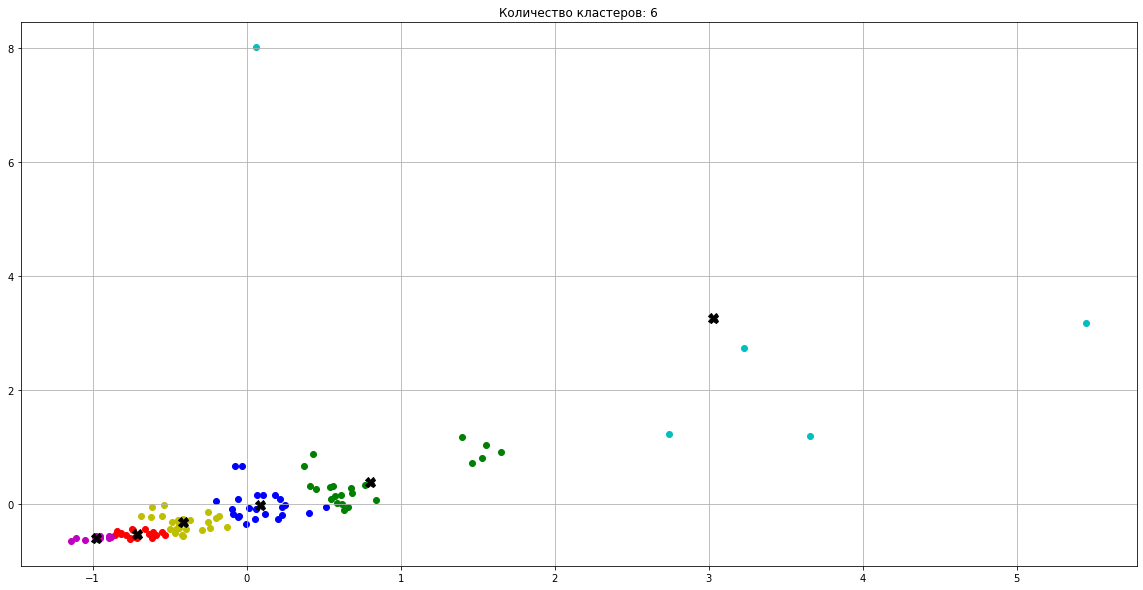

Центроиды: [[0.09, -0.02], [-0.71, -0.53], [0.8, 0.39], [-0.98, -0.59], [-0.41, -0.32], [3.03, 3.27]]
Количество элементов в кластерах [23, 18, 22, 12, 25, 5]

 ------------------------------------------------------------------------------------------------------------------------------------------------------


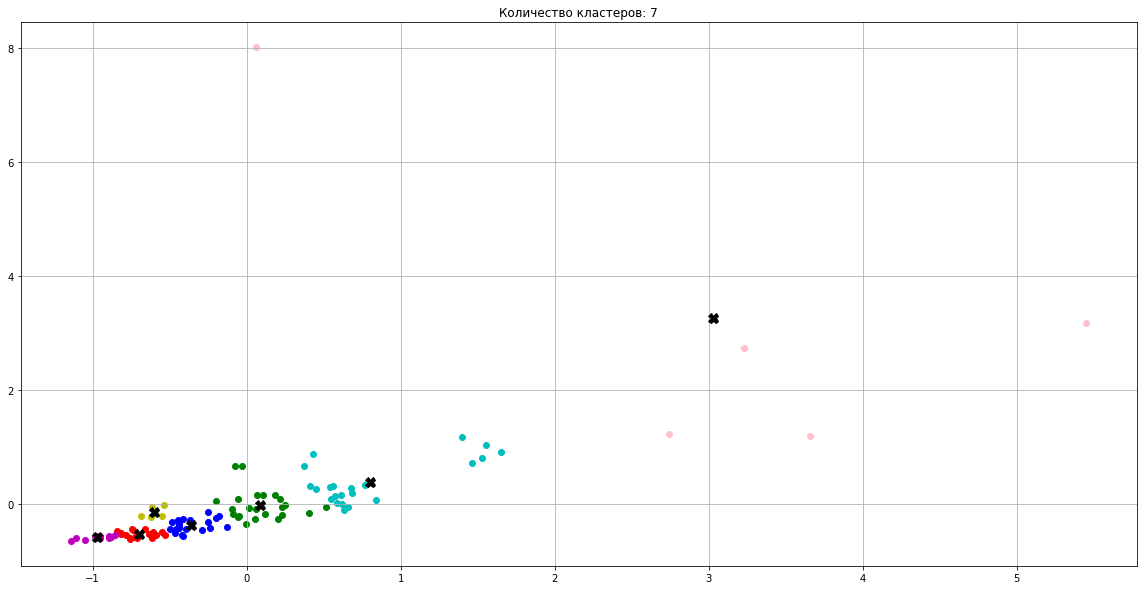

Центроиды: [[-0.36, -0.37], [-0.7, -0.53], [0.09, -0.02], [-0.97, -0.58], [-0.6, -0.14], [0.8, 0.39], [3.03, 3.27]]
Количество элементов в кластерах [20, 17, 23, 13, 5, 22, 5]

 ------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
mean_C = []
mean_x = []
mean_y = []

for i in range(rouppest):
    Center_mean,list_x,list_y,kol_el=Kmeans(df['Data_1'],df['Data_2'],C[i],i+1)
    
    mean_C.append(Center_mean)
    mean_x.append(list_x)
    mean_y.append(list_y)
    
    print_gr(Center_mean,list_x,list_y,i+1)
    print("Центроиды:", Center_mean)
    print("Количество элементов в кластерах",kol_el)
    print('\n','-'*150)
    Table_1.add_row([i+1,Center_mean[0],kol_el[0]])
    for j in range(1,i+1):
        Table_1.add_row(["",Center_mean[j],kol_el[j]])

### Задача 4
Реализовать алгоритм k-medoids. Отобразить полученные кластеры, каждый кластер выделить разным цветом или маркером,
отметить центроиды.

In [ ]:
def Kmedoids(x,y,prim_Center,n):
    
    res_Center = prim_Center.copy()
    
    bias=np.inf
    while bias>0.01:
        list_x=[]
        list_y=[]
        for i in range(n):
            list_x+=[[]]
            list_y+=[[]]
        for i in range(len(x)):
            range_=[0]*n
            
            for j in range(n):
                range_[j]=((x[i]-prim_Center[j][0])**2+(y[i]-prim_Center[j][1])**2)
                
            min_=100
            l=0
            for k in range(n):
                if range_[k]<min_:
                    min_=range_[k]
                    l=k
            list_x[l]+=[x[i]]
            list_y[l]+=[y[i]]
            
        nice_index = [0]*n
        for i in range(n):
            Nn = len(list_x[i])
            sum_=[0]* (Nn)
            for j in range(Nn):
                for z in range(Nn):
                    if (z!=j):
                        sum_[j] += ((list_x[i][j]-list_x[i][z])**2 + (list_y[i][j]-list_y[i][z])**2)
                        
            nice_index[i] = sum_.index(min(sum_))
        
        bias_c=[0]*n
        for i in range(n):
            bias_c[i]= (list_x[i][nice_index[i]]-prim_Center[i][0])**2+(list_y[i][nice_index[i]]-prim_Center[i][1])**2
        bias=sum(bias_c)
        
        
        for i in range(n):
            res_Center[i][0]= round(list_x[i][nice_index[i]],2)
            res_Center[i][1]= round(list_y[i][nice_index[i]],2)
            
        counter = [0] * n
        for i in range(n):
            counter[i]=[len(list_x[i])]
            
    return res_Center, list_x,list_y,counter

In [ ]:
A = [17,41,60,70,72,90,104]
C = [[[0 for k in range(2)] for j in range(i+1)] for i in range(rouppest)]
for i in range(0,len(A)):
    for j in range(0,i+1):
        C[i][j][0] = df['Data_1'][A[j]]
        C[i][j][1] = df['Data_2'][A[j]]

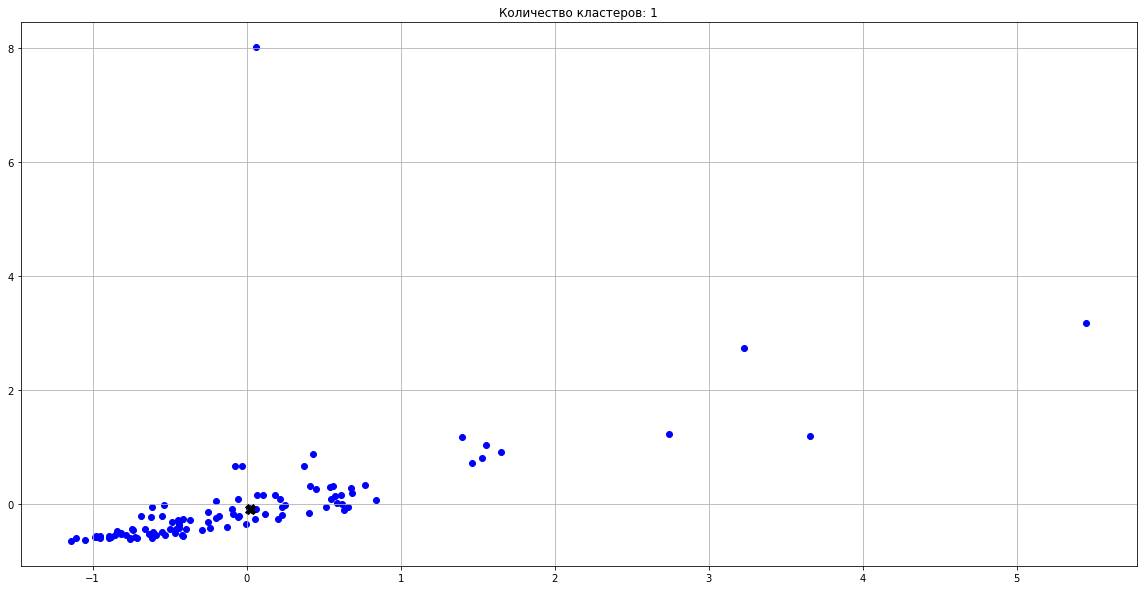

Центроиды: [[0.02, -0.08]]
Количество элементов в кластерах [[105]]

 ----------------------------------------------------------------------------------------------------------------------------------------------------------------


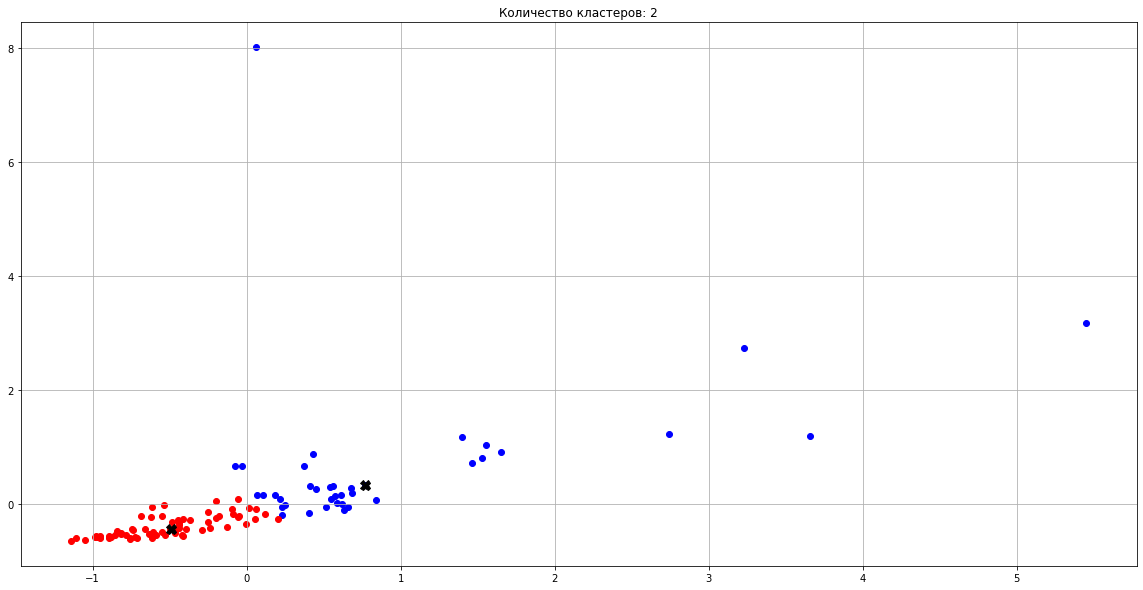

Центроиды: [[0.77, 0.34], [-0.49, -0.44]]
Количество элементов в кластерах [[38], [67]]

 ----------------------------------------------------------------------------------------------------------------------------------------------------------------


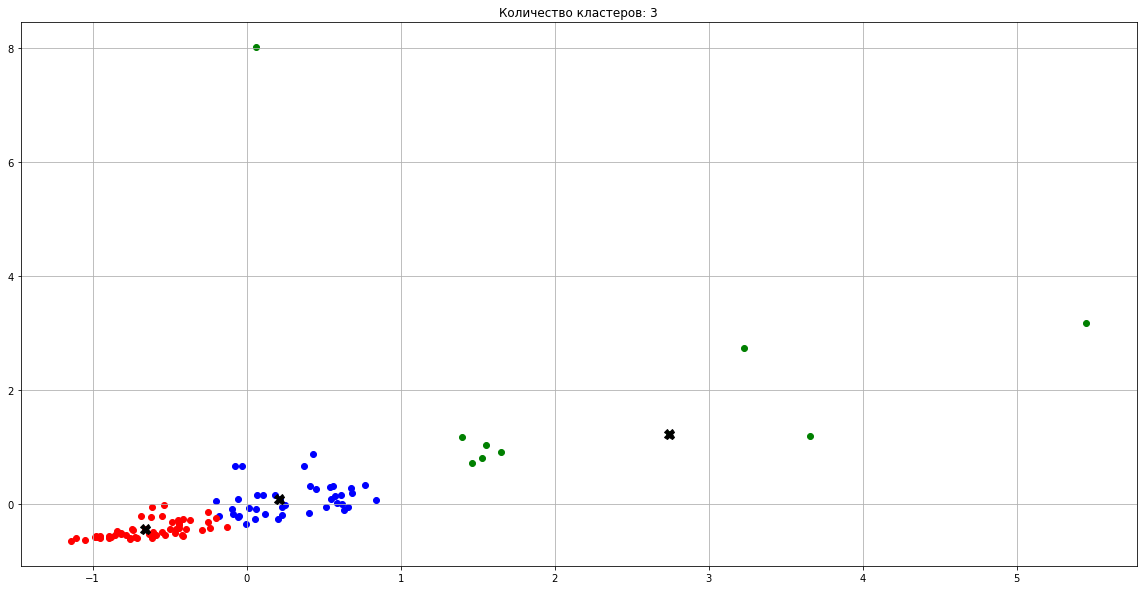

Центроиды: [[0.21, 0.09], [-0.66, -0.44], [2.74, 1.23]]
Количество элементов в кластерах [[41], [54], [10]]

 ----------------------------------------------------------------------------------------------------------------------------------------------------------------


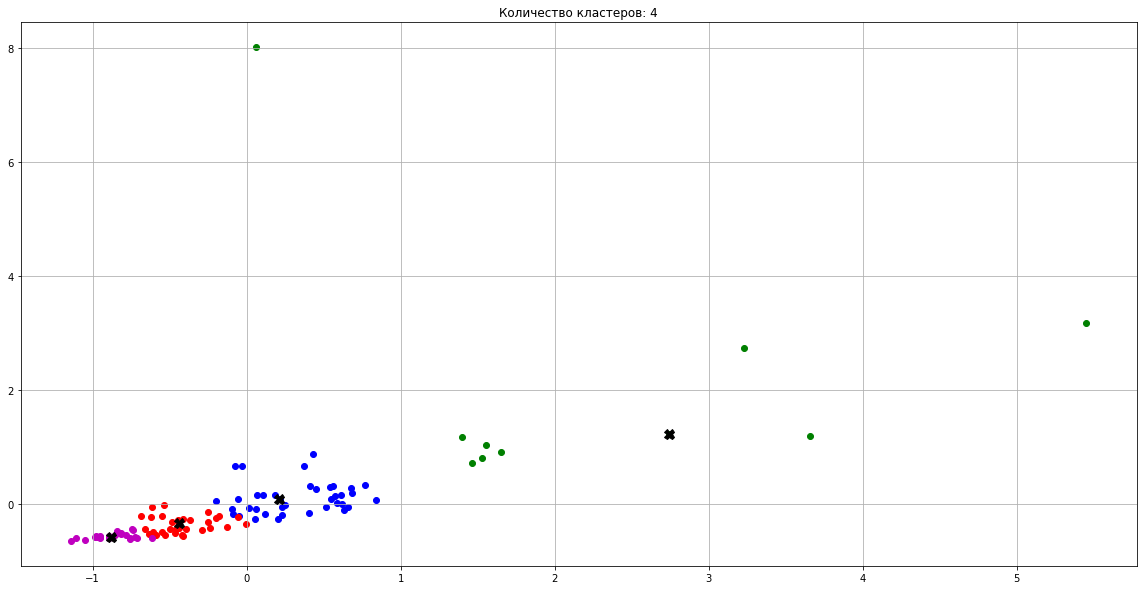

Центроиды: [[0.21, 0.09], [-0.44, -0.33], [2.74, 1.23], [-0.88, -0.58]]
Количество элементов в кластерах [[38], [33], [10], [24]]

 ----------------------------------------------------------------------------------------------------------------------------------------------------------------


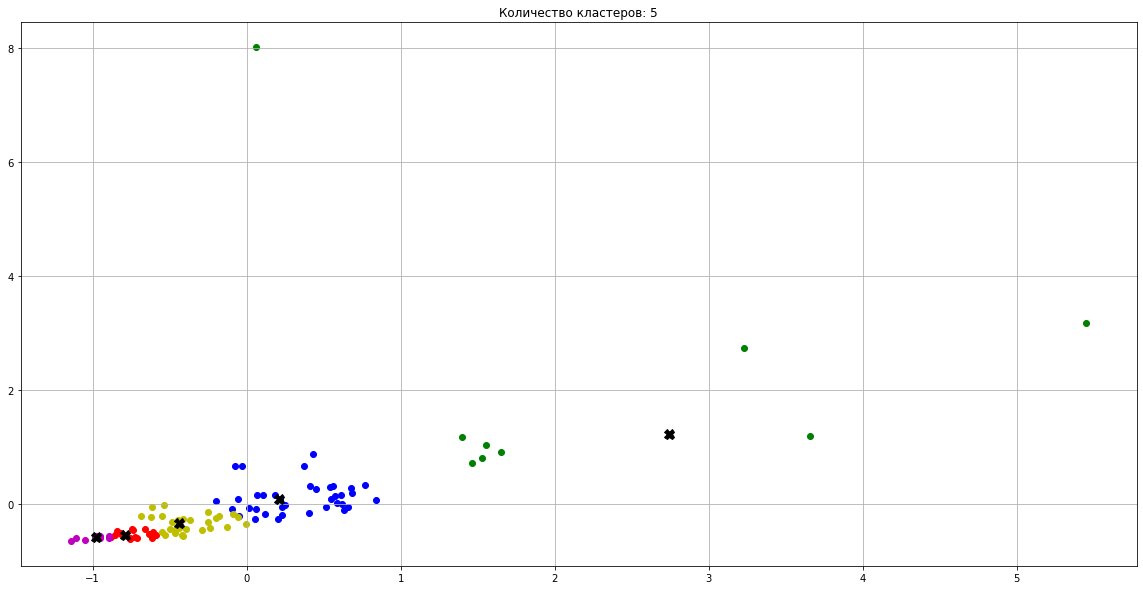

Центроиды: [[0.21, 0.09], [-0.79, -0.55], [2.74, 1.23], [-0.98, -0.58], [-0.44, -0.33]]
Количество элементов в кластерах [[37], [17], [10], [11], [30]]

 ----------------------------------------------------------------------------------------------------------------------------------------------------------------


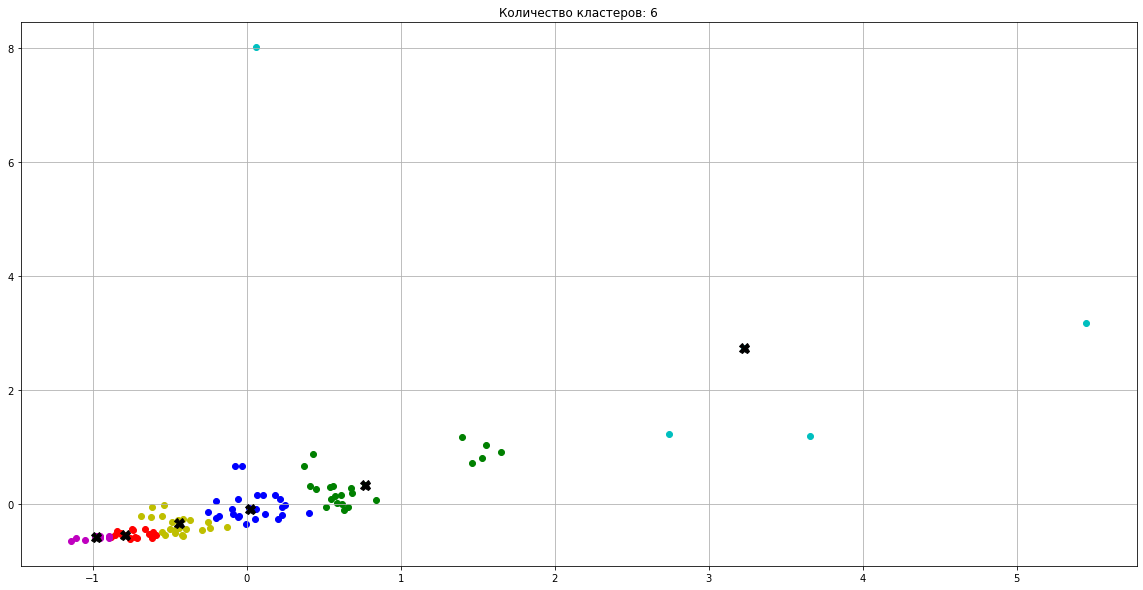

Центроиды: [[0.02, -0.08], [-0.79, -0.55], [0.77, 0.34], [-0.98, -0.58], [-0.44, -0.33], [3.23, 2.74]]
Количество элементов в кластерах [[25], [17], [23], [11], [24], [5]]

 ----------------------------------------------------------------------------------------------------------------------------------------------------------------


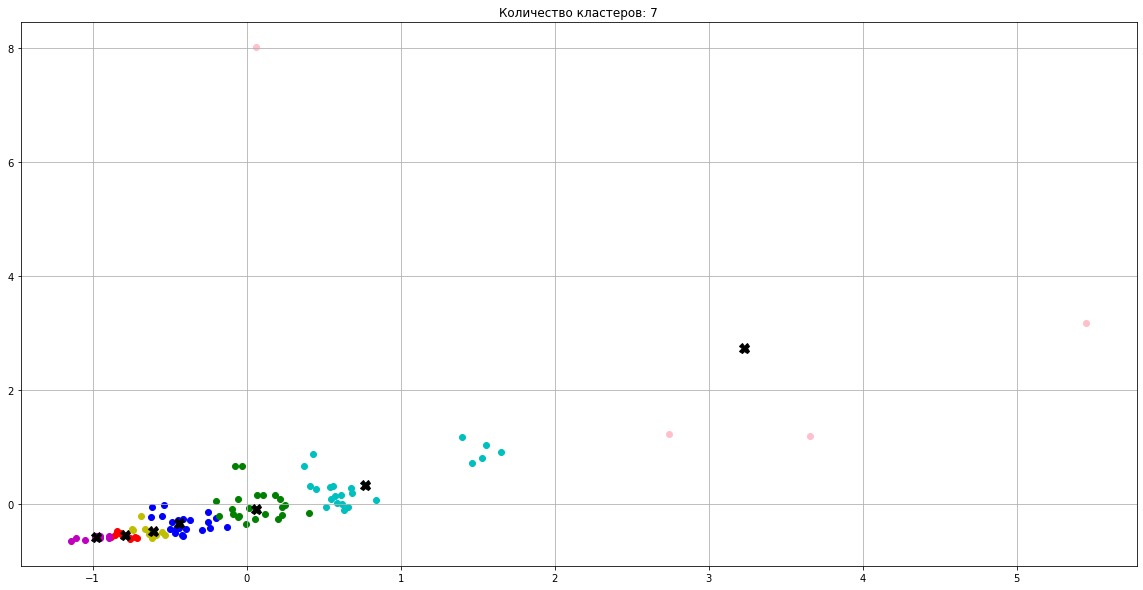

Центроиды: [[-0.44, -0.33], [-0.79, -0.55], [0.06, -0.09], [-0.98, -0.58], [-0.61, -0.48], [0.77, 0.34], [3.23, 2.74]]
Количество элементов в кластерах [[23], [10], [23], [11], [10], [23], [5]]

 ----------------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
med_C = []
med_x = []
med_y = []

Table_2 = PrettyTable(["Значение k","Центроиды кластера","Объем кластера"])
for i in range(rouppest):
    Center_med,list_x,list_y,kol_el=Kmedoids(df['Data_1'],df['Data_2'],C[i],i+1)
    med_C.append(Center_med)
    med_x.append(list_x)
    med_y.append(list_y)
    print_gr(Center_med,list_x,list_y,i+1)
    print("Центроиды:", Center_med)
    print("Количество элементов в кластерах",kol_el)
    print('\n','-'*160)
    Table_2.add_row([i+1,Center_med[0],kol_el[0]])
    for j in range(1,i+1):
        Table_2.add_row(["",Center_med[j],kol_el[j]])

### Задача 5
Для каждого метода заполнить следующую таблицу, где значения
𝑘 изменяются от 1 до ˜𝑘:

In [ ]:
print("Алгоритм k-means:")
print(Table_1)
print("Алгоритм k-medoids:")
print(Table_2)

Алгоритм k-means:
+------------+--------------------+----------------+
| Значение k | Центроиды кластера | Объем кластера |
+------------+--------------------+----------------+
|     1      |    [-0.0, -0.0]    |      105       |
|     2      |    [2.27, 2.1]     |       10       |
|            |   [-0.24, -0.22]   |       95       |
|     3      |    [0.53, 0.25]    |       38       |
|            |   [-0.57, -0.42]   |       62       |
|            |    [3.03, 3.27]    |       5        |
|     4      |    [0.66, 0.34]    |       29       |
|            |   [-0.21, -0.24]   |       39       |
|            |    [3.03, 3.27]    |       5        |
|            |   [-0.81, -0.53]   |       32       |
|     5      |    [0.8, 0.39]     |       22       |
|            |   [-0.48, -0.38]   |       29       |
|            |    [3.03, 3.27]    |       5        |
|            |   [-0.88, -0.56]   |       23       |
|            |   [0.05, -0.04]    |       26       |
|     6      |   [0.09, -0.0

## Задача 6
С помощью метода локтя выявить (для каждого метода) оптимальное количество кластеров.

Метод локтя для метода k-mean:




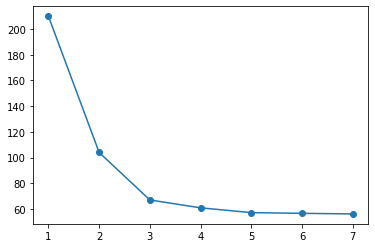

[210.0, 103.99249500684314, 67.02267537457007, 60.900509840122595, 57.17251938853454, 56.61463847280713, 56.164507998233425]


In [ ]:
W = [0]*rouppest
K = [i for i in range(1,rouppest + 1)]
print('Метод локтя для метода k-mean:\n\n')
for i in range(rouppest):
    W_helper_2 = 0
    for j in range(len(mean_C[i])):
        W_helper = 0
        
        for k in range(len(mean_x[i][j])):
            W_helper+=((mean_x[i][j][k] - mean_C[i][j][0])**2 + (mean_y[i][j][k] - mean_C[i][j][1])**2)
            
        W_helper_2+=W_helper
    W[i] = W_helper_2
plt.plot(K,W,marker='o')
plt.show()
print(W)

Судя по полученому графику, оптимальное количество кластеров для k-means = 3

Метод локтя для метода k-medoids:




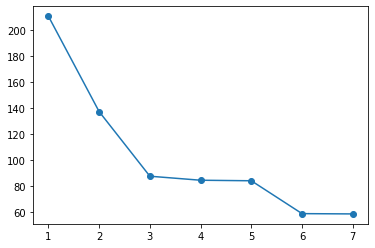

[210.71400000000003, 137.20667494180913, 87.43164008262383, 84.33899346519401, 83.92161924920704, 58.5974430998869, 58.379579350724256]


In [ ]:
print('Метод локтя для метода k-medoids:\n\n')
W = [0]*7
for i in range(rouppest):
    W_helper_2 = 0
    for j in range(len(med_C[i])):
        W_helper = 0
        for k in range(len(med_x[i][j])):
            W_helper+=((med_x[i][j][k] - med_C[i][j][0])**2 + (med_y[i][j][k] - med_C[i][j][1])**2)
        W_helper_2+=W_helper
    W[i] = W_helper_2
plt.plot(K,W,marker='o')
plt.show()  
print(W)

Судя по полученому графику, оптимальное количество кластеров для k-medoids = 3

Вывод: оптимальное количество кластеров для k-medoids и k-means одинаково и = 3

### Задача 7
Реализовать алгоритм поиска сгущений при различных радиусах
𝑅, отобразить полученные кластеры, выделить каждый кластер
разным цветом или маркером, отметить центроиды. Результаты
представить в виде таблицы

In [ ]:
def FOREL(x, y, R):
    center= []
    clusters = []
    u=[]
    kol_el=[]
    for i in range(len(x)):
        u+=[[x[i],y[i]]]
    while (len(u)!=0):
        xc = u[0]
        while True:
            k=[]
            for i in range(len(u)):
                if ((xc[0]-u[i][0])**2 + (xc[1]-u[i][1])**2)**0.5 <= R:
                    k+=[u[i]]
            xc_=[0,0]
            for i in range(len(k)):
                xc_[0]+=k[i][0]/len(k)
                xc_[1]+=k[i][1]/len(k)
            if xc == xc_:
                break
            xc = xc_
        u = [i for i in u if i not in k]
        center+=[xc]
        clusters+=[k]
        kol_el+=[len(k)]
    return center,clusters,kol_el

Найдем значения $R_{min}$ и $R_{max}$

In [ ]:
R_min = 10000
R_max = -1
for i in range(N+1):
    for j in range(i+1,N):
        pR = math.sqrt((df['Data_1'][i]-df['Data_1'][j])**2 + (df['Data_2'][i]-df['Data_2'][j])**2)
        if R_max < pR:
            R_max = pR 
        if R_min > pR and pR > 0:
            R_min = pR 

print("R[min] = ",round(R_min,3))
print("R[max] = ",round(R_max,3))

R[min] =  0.006
R[max] =  8.752


In [ ]:
def gr(center,cl):
    fig, graf=plt.subplots(figsize=(20, 10))
    
    
    color= ['b','r','g','m','c',
           'lime','deeppink','darkorange','tomato','sienna',
           'indigo','midnightblue']
    
    for j in range(len(cl)):
        for k in range(len(cl[j])):
            graf.scatter(cl[j][k][0],cl[j][k][1],c=color[j])
        plt.plot(center[j][0],center[j][1],'k',marker="X", markersize=10)   
    plt.grid()
    plt.show()

Радиус R =  8.752
Количество кластеров: 1
Центроиды: [[-0. -0.]]
Объем кластеров: [105]


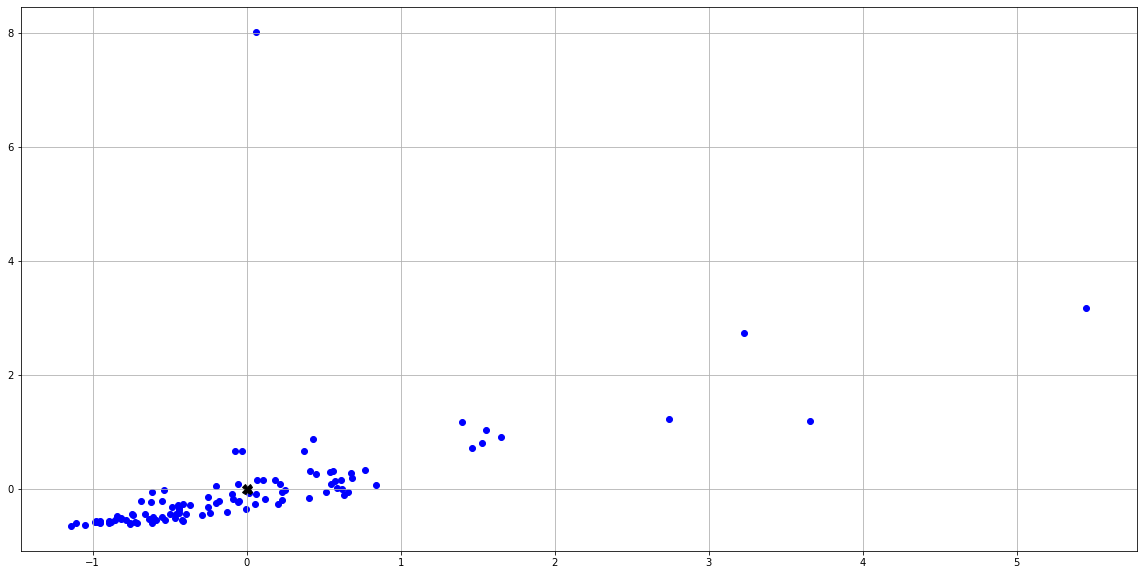

Радиус R =  2.752
Количество кластеров: 3
Центроиды: [[-0.151 -0.164]
 [ 0.058  8.02 ]
 [ 3.77   2.086]]
Объем кластеров: [100, 1, 4]


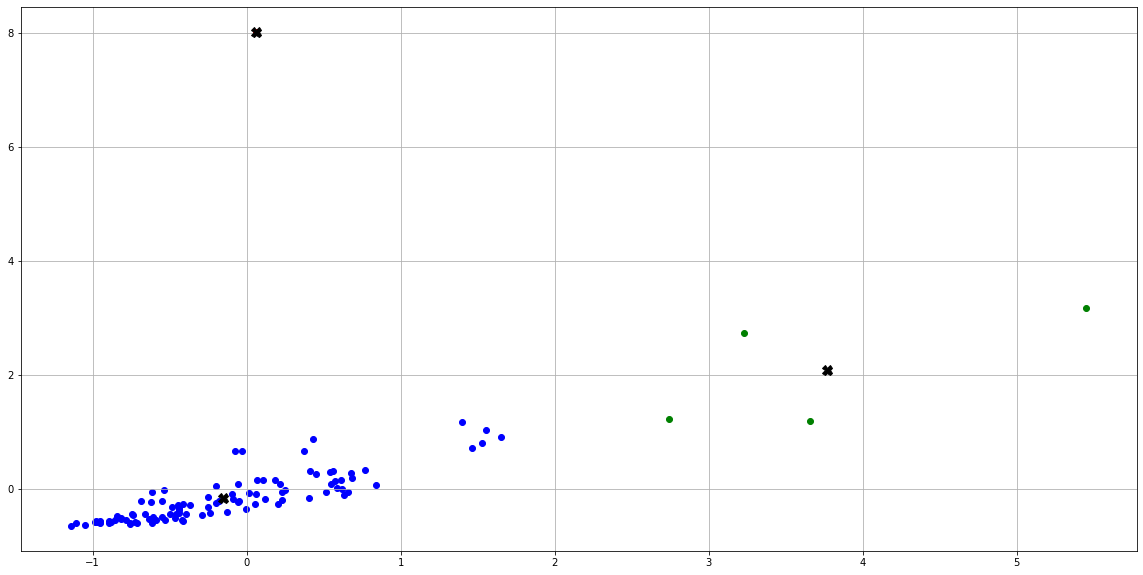

Радиус R =  2.252
Количество кластеров: 4
Центроиды: [[-0.151 -0.164]
 [ 0.058  8.02 ]
 [ 3.211  1.724]
 [ 5.449  3.174]]
Объем кластеров: [100, 1, 3, 1]


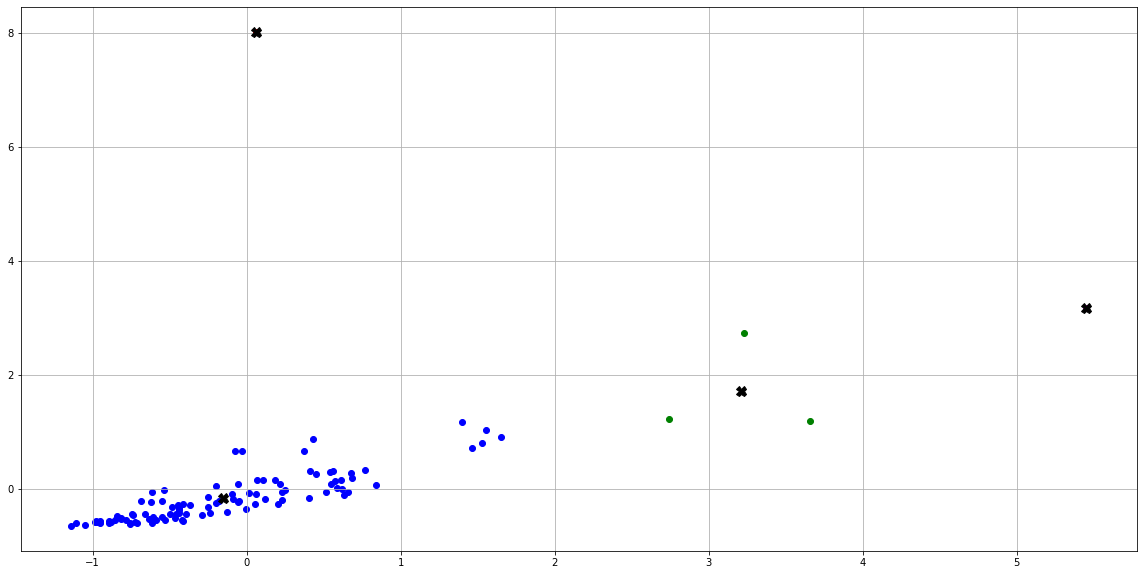

Радиус R =  1.352
Количество кластеров: 6
Центроиды: [[-0.239 -0.221]
 [ 0.058  8.02 ]
 [ 3.201  1.214]
 [ 5.449  3.174]
 [ 3.229  2.743]
 [ 1.519  0.933]]
Объем кластеров: [95, 1, 2, 1, 1, 5]


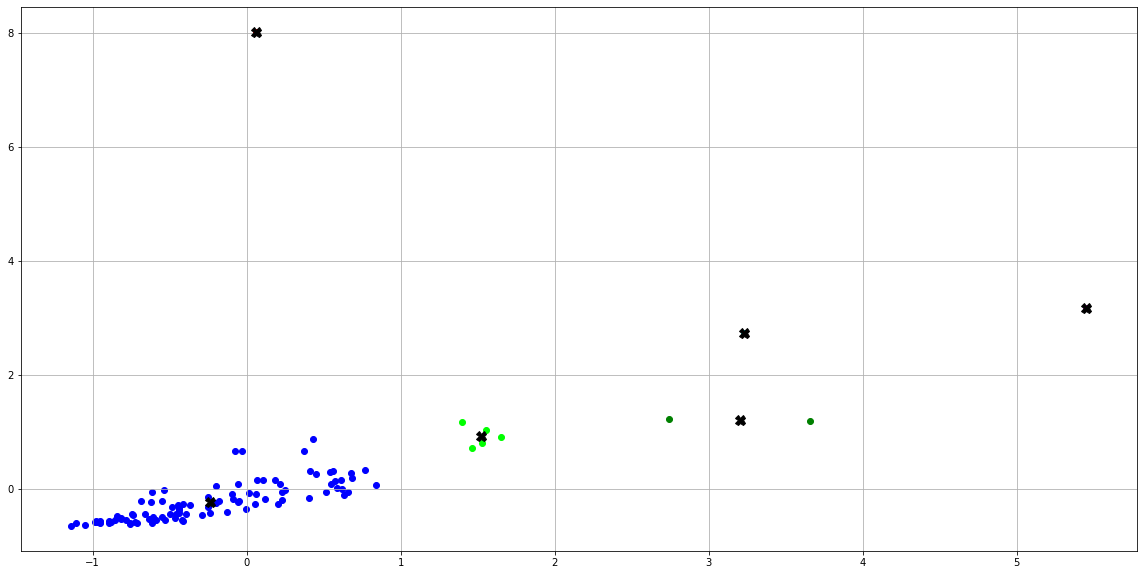

Радиус R =  0.752
Количество кластеров: 8
Центроиды: [[-0.519 -0.393]
 [ 0.431  0.189]
 [ 0.058  8.02 ]
 [ 3.658  1.202]
 [ 5.449  3.174]
 [ 2.745  1.227]
 [ 3.229  2.743]
 [ 1.519  0.933]]
Объем кластеров: [67, 28, 1, 1, 1, 1, 1, 5]


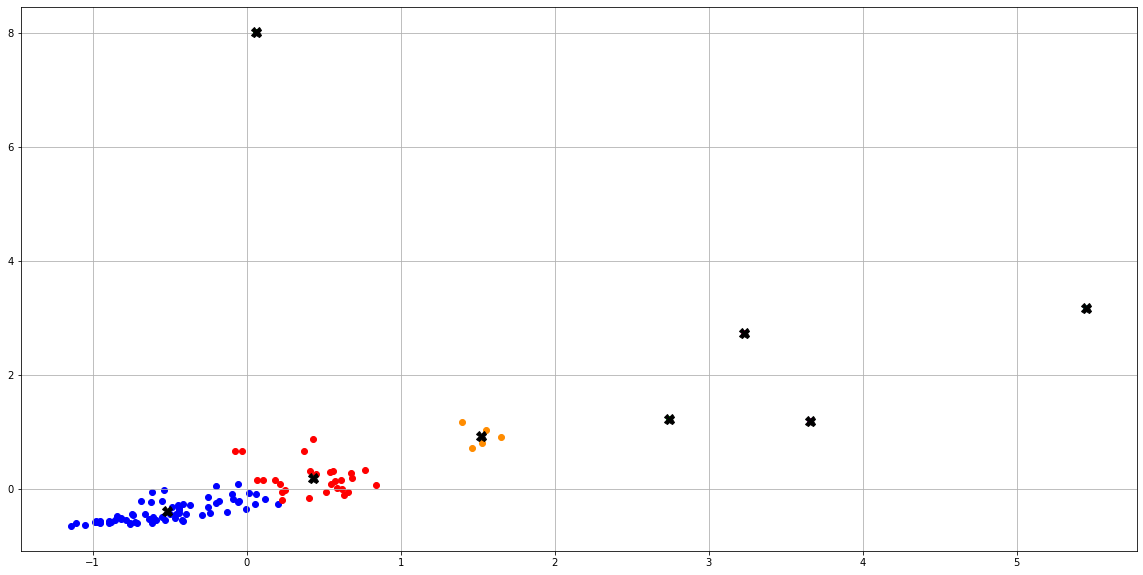

Радиус R =  0.402
Количество кластеров: 12
Центроиды: [[-0.66  -0.476]
 [ 0.014 -0.129]
 [ 0.605  0.144]
 [ 0.058  8.02 ]
 [ 3.658  1.202]
 [ 5.449  3.174]
 [ 2.745  1.227]
 [ 3.229  2.743]
 [ 1.519  0.933]
 [ 0.173  0.718]
 [-0.578 -0.029]
 [-1.1   -0.621]]
Объем кластеров: [44, 26, 16, 1, 1, 1, 1, 1, 5, 4, 2, 3]


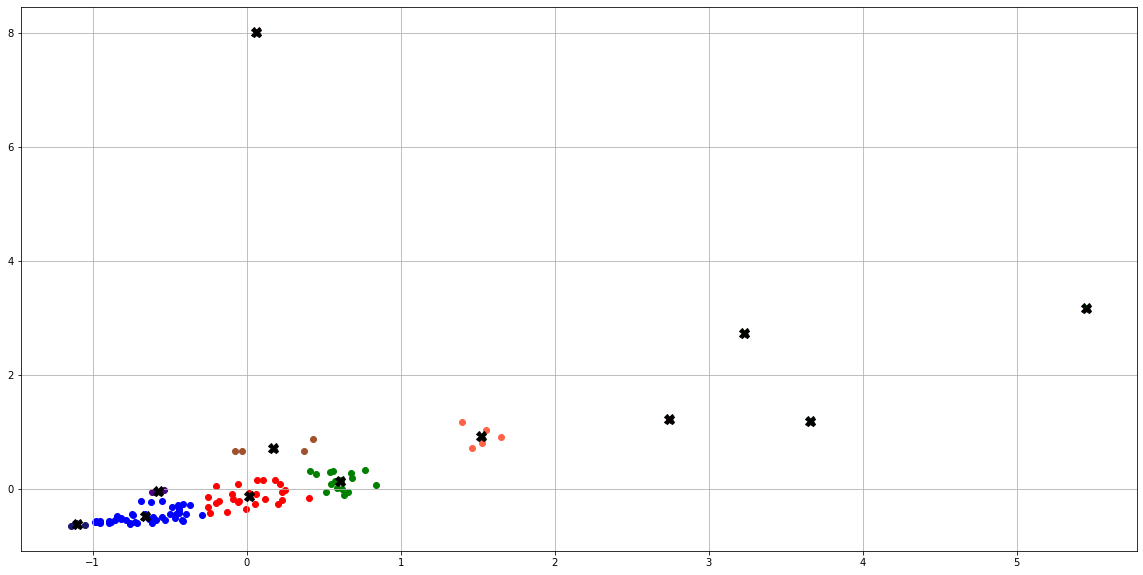

In [ ]:
R=[R_max,R_max-6,R_max-6.5,R_max-7.4,R_max-8.0,R_max-8.35]


Table_3 = PrettyTable(["Значение R","Центроиды кластера","Объем кластера"])
for i in range(len(R)):
    center,cl,kol_el=FOREL(df['Data_1'],df['Data_2'],R[i]) 
    print("Радиус R = ", round(R[i],3))
    print("Количество кластеров:",len(cl))
    for k in range(len(cl)):
        for j in range(len(center[k])):
            center[k][j]=round(center[k][j],3)   
    print("Центроиды:", np.array(center))
    print("Объем кластеров:",kol_el)
    Table_3.add_row([round(R[i],3),center[0],kol_el[0]])
    for j in range(1,len(cl)):
        Table_3.add_row(["",center[j],kol_el[j]])
    gr(center,cl)


In [ ]:
print('Результат:')
print(Table_3)

Результат:
+------------+--------------------+----------------+
| Значение R | Центроиды кластера | Объем кластера |
+------------+--------------------+----------------+
|   8.752    |    [-0.0, -0.0]    |      105       |
|   2.752    |  [-0.151, -0.164]  |      100       |
|            |   [0.058, 8.02]    |       1        |
|            |   [3.77, 2.086]    |       4        |
|   2.252    |  [-0.151, -0.164]  |      100       |
|            |   [0.058, 8.02]    |       1        |
|            |   [3.211, 1.724]   |       3        |
|            |   [5.449, 3.174]   |       1        |
|   1.352    |  [-0.239, -0.221]  |       95       |
|            |   [0.058, 8.02]    |       1        |
|            |   [3.201, 1.214]   |       2        |
|            |   [5.449, 3.174]   |       1        |
|            |   [3.229, 2.743]   |       1        |
|            |   [1.519, 0.933]   |       5        |
|   0.752    |  [-0.519, -0.393]  |       67       |
|            |   [0.431, 0.189]   |

### Задача 8
Проверить чувствительность метода поиска сгущений к погрешностям. Сделать выводы.

Чтобы проверить чувствительность метода, необходимо к каждому радиусу из предыдущего пункта добавить $\varepsilon=0.001$

Количество кластеров: 1
Центроиды: [[-0. -0.]]
Объем кластеров: [105]


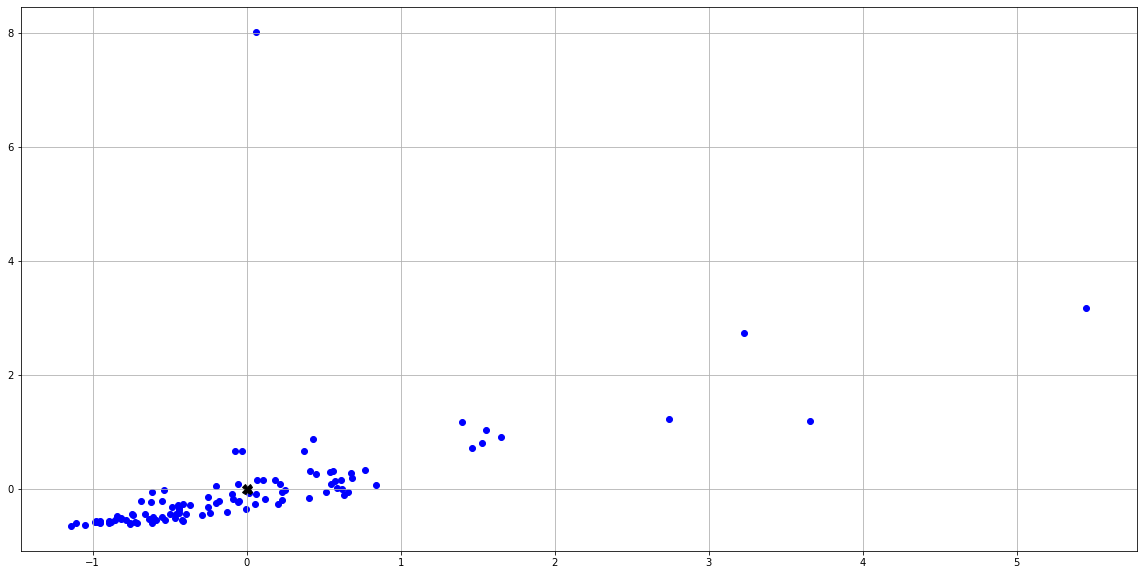

Количество кластеров: 3
Центроиды: [[-0.151 -0.164]
 [ 0.058  8.02 ]
 [ 3.77   2.086]]
Объем кластеров: [100, 1, 4]


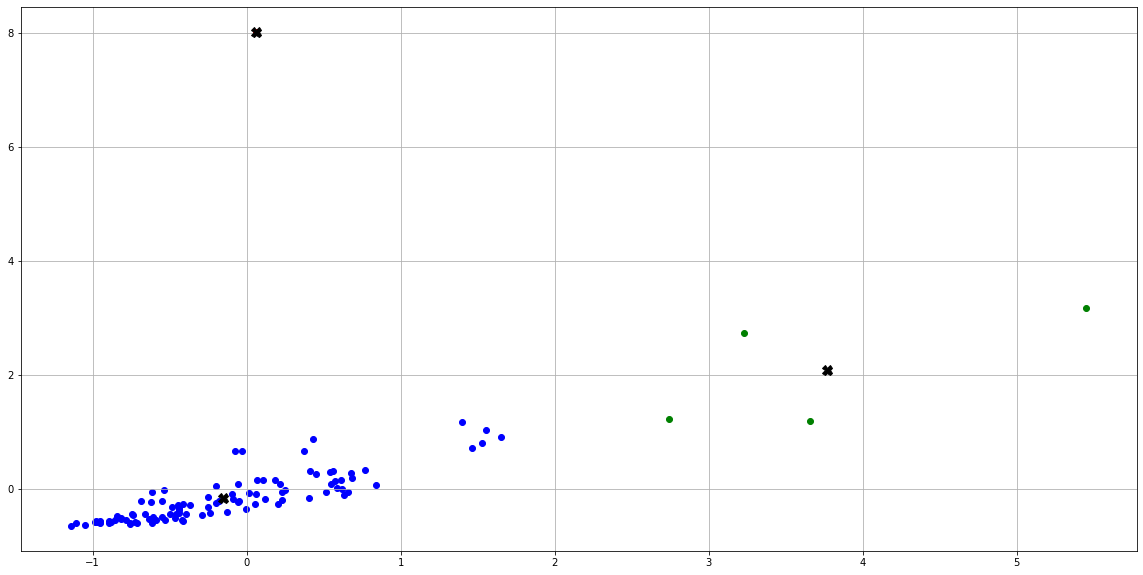

Количество кластеров: 4
Центроиды: [[-0.151 -0.164]
 [ 0.058  8.02 ]
 [ 3.211  1.724]
 [ 5.449  3.174]]
Объем кластеров: [100, 1, 3, 1]


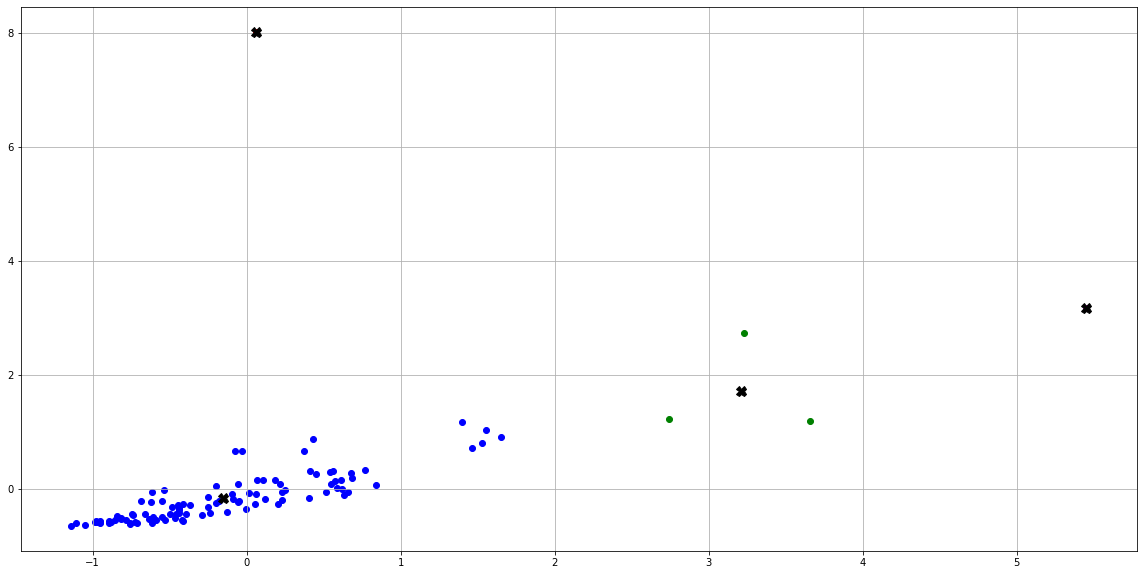

Количество кластеров: 6
Центроиды: [[-0.239 -0.221]
 [ 0.058  8.02 ]
 [ 3.201  1.214]
 [ 5.449  3.174]
 [ 3.229  2.743]
 [ 1.519  0.933]]
Объем кластеров: [95, 1, 2, 1, 1, 5]


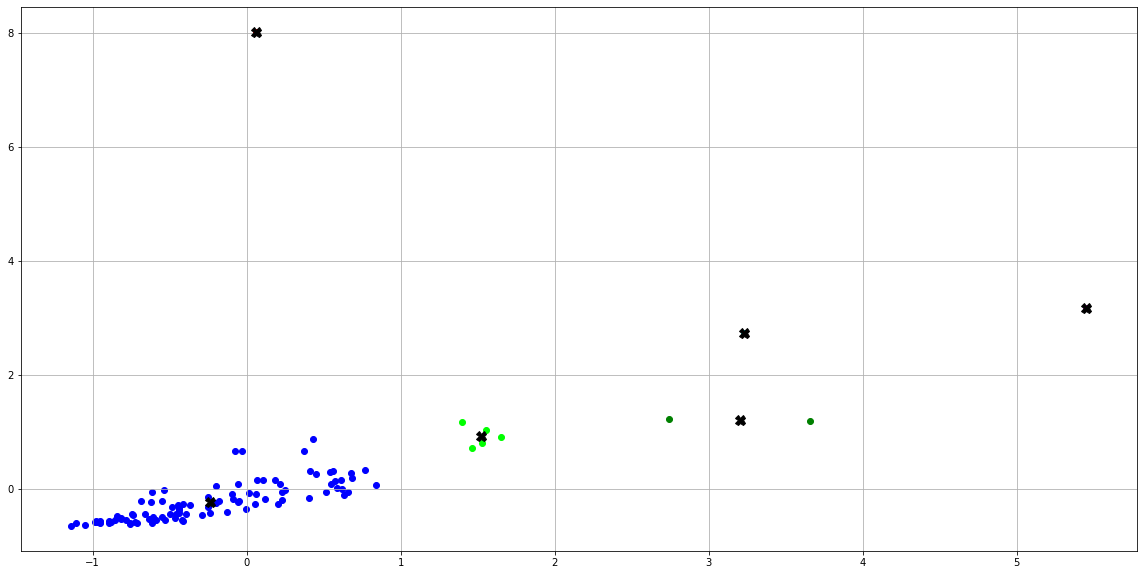

Количество кластеров: 8
Центроиды: [[-0.519 -0.393]
 [ 0.431  0.189]
 [ 0.058  8.02 ]
 [ 3.658  1.202]
 [ 5.449  3.174]
 [ 2.745  1.227]
 [ 3.229  2.743]
 [ 1.519  0.933]]
Объем кластеров: [67, 28, 1, 1, 1, 1, 1, 5]


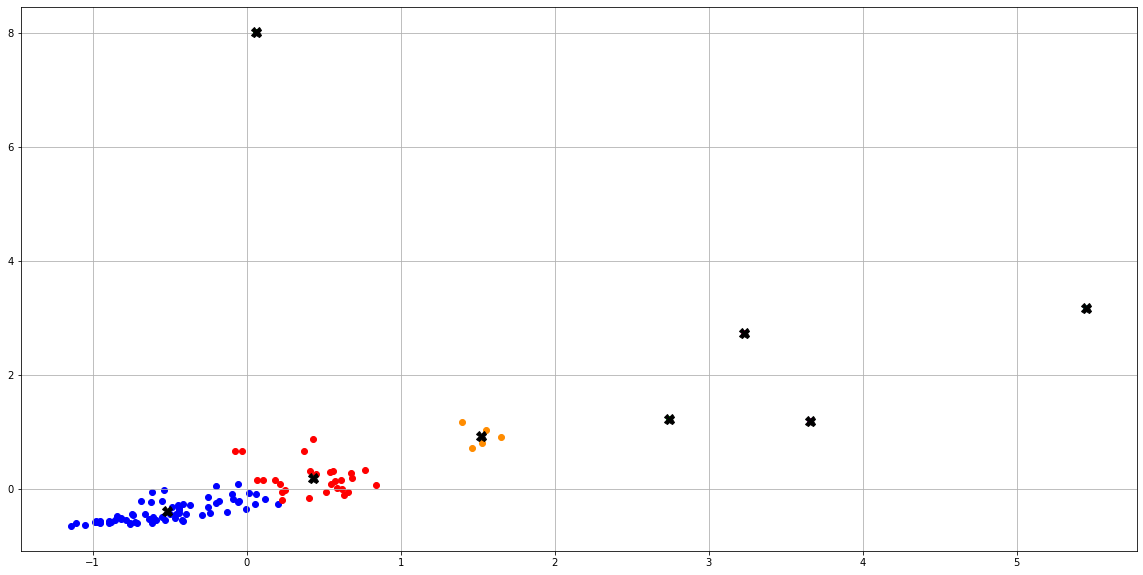

Количество кластеров: 12
Центроиды: [[-0.66  -0.476]
 [ 0.014 -0.129]
 [ 0.605  0.144]
 [ 0.058  8.02 ]
 [ 3.658  1.202]
 [ 5.449  3.174]
 [ 2.745  1.227]
 [ 3.229  2.743]
 [ 1.519  0.933]
 [ 0.173  0.718]
 [-0.578 -0.029]
 [-1.1   -0.621]]
Объем кластеров: [44, 26, 16, 1, 1, 1, 1, 1, 5, 4, 2, 3]


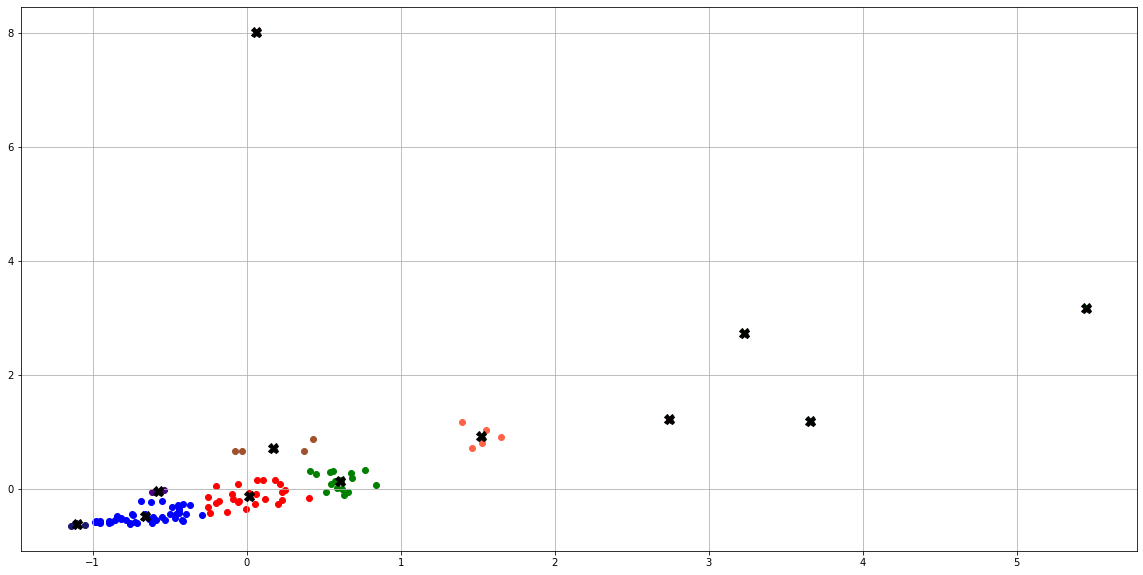

In [ ]:
Table_4 = PrettyTable(["Значение R","Центроиды кластера","Объем кластера"])
for i in range(len(R)):
    R[i]=R[i]+0.001
    center,cl,kol_el=FOREL(df['Data_1'],df['Data_2'],R[i]) 
    print("Количество кластеров:",len(cl))
    for k in range(len(cl)):
        for j in range(len(center[k])):
            center[k][j]=round(center[k][j],3)   
    print("Центроиды:", np.array(center))
    print("Объем кластеров:",kol_el)
    Table_4.add_row([round(R[i],3),center[0],kol_el[0]])
    for j in range(1,len(cl)):
        Table_4.add_row(["",center[j],kol_el[j]])
    gr(center,cl)

In [ ]:
print('Результат:')
print(Table_4)

Результат:
+------------+--------------------+----------------+
| Значение R | Центроиды кластера | Объем кластера |
+------------+--------------------+----------------+
|   8.753    |    [-0.0, -0.0]    |      105       |
|   2.753    |  [-0.151, -0.164]  |      100       |
|            |   [0.058, 8.02]    |       1        |
|            |   [3.77, 2.086]    |       4        |
|   2.253    |  [-0.151, -0.164]  |      100       |
|            |   [0.058, 8.02]    |       1        |
|            |   [3.211, 1.724]   |       3        |
|            |   [5.449, 3.174]   |       1        |
|   1.353    |  [-0.239, -0.221]  |       95       |
|            |   [0.058, 8.02]    |       1        |
|            |   [3.201, 1.214]   |       2        |
|            |   [5.449, 3.174]   |       1        |
|            |   [3.229, 2.743]   |       1        |
|            |   [1.519, 0.933]   |       5        |
|   0.753    |  [-0.519, -0.393]  |       67       |
|            |   [0.431, 0.189]   |

In [ ]:
print('R:')
print(Table_3)

print('\n\nR + 0.001:')
print(Table_4)

R:
+------------+--------------------+----------------+
| Значение R | Центроиды кластера | Объем кластера |
+------------+--------------------+----------------+
|   8.752    |    [-0.0, -0.0]    |      105       |
|   2.752    |  [-0.151, -0.164]  |      100       |
|            |   [0.058, 8.02]    |       1        |
|            |   [3.77, 2.086]    |       4        |
|   2.252    |  [-0.151, -0.164]  |      100       |
|            |   [0.058, 8.02]    |       1        |
|            |   [3.211, 1.724]   |       3        |
|            |   [5.449, 3.174]   |       1        |
|   1.352    |  [-0.239, -0.221]  |       95       |
|            |   [0.058, 8.02]    |       1        |
|            |   [3.201, 1.214]   |       2        |
|            |   [5.449, 3.174]   |       1        |
|            |   [3.229, 2.743]   |       1        |
|            |   [1.519, 0.933]   |       5        |
|   0.752    |  [-0.519, -0.393]  |       67       |
|            |   [0.431, 0.189]   |       2

Вывод:
При сравнении таблиц было выявлено, что таблицы идентичны $\Rightarrow$ метод нечувствителен к погрешностям.

### Пункт 9
Сравнить методы. Сделать выводы.


Выводы по результатам сравнения методов:

По методу локтя, было выявлено, что для данной выборки оптимальное количество кластеров для алгоритмов k-means и k-medoids = 3. Разница, между полученными кластерами незначительна.

Если сравнивать методы FOREL и k-means/k-medoids, можно заметить, что в первом вышесказаном методе кластеризация проходит неравномерно( объёмы кластеров сильно отличаются друг от друга), в отличие от k-means/k-medoids, где кластеризация проходит более плано, а точки равномерно распределяются.

## Выводы:

В ходе выполнения работы были освоены основные понятия и методы кластерного анализа: K-Means, K-Medoids, FOREL, метод локтя. Найдена «грубая» верхняя оценка количества кластеров = 7. Произведено разбиение исходного множества объектов на конечное число подмножеств(кластеров) с использованием вышеописаных, методов. Проведена оценка оптимального количество кластеров для для k-means/k-medoids, по методу локтя, в результате которого выявлено, что оптимальное количество кластеров = 3.
